<a href="https://colab.research.google.com/github/AdarshKumar420/Speech-Emotion-Recognition-Adarsh-Kumar/blob/master/Complete_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Speech Emotion Recognition(SER)**

###**Emotion classification using the RAVDESS dataset**

The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS) is licensed under CC BY-NA-SC 4.0. and can be downloaded free of charge at https://zenodo.org/record/1188976.

**Construction and Validation**

Construction and validation of the RAVDESS is described in our paper: Livingstone SR, Russo FA (2018) The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS): A dynamic, multimodal set of facial and vocal expressions in North American English. PLoS ONE 13(5): e0196391. https://doi.org/10.1371/journal.pone.0196391.

The RAVDESS contains 7356 files. Each file was rated 10 times on emotional validity, intensity, and genuineness. Ratings were provided by 247 individuals who were characteristic of untrained adult research participants from North America. A further set of 72 participants provided test-retest data. High levels of emotional validity, interrater reliability, and test-retest intrarater reliability were reported. Validation data is open-access, and can be downloaded along with our paper from PLOS ONE.

**Description**

The dataset contains the complete set of 7356 RAVDESS files (total size: 24.8 GB). Each of the 24 actors consists of three modality formats: Audio-only (16bit, 48kHz .wav), Audio-Video (720p H.264, AAC 48kHz, .mp4), and Video-only (no sound). Note, there are no song files for Actor_18.

**Data**

For this task, we are using 1440 samples from the RAVDESS dataset.

The samples comes from:


**Audio-files(speech only)**

**License information**

The RAVDESS is released under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License, CC BY-NA-SC 4.0

**File naming convention**

Each of the 7356 RAVDESS files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 02-01-06-01-02-01-12.mp4). These identifiers define the stimulus characteristics:

**Filename identifiers**

*   Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
*   Vocal channel (01 = speech, 02 = song).
*   Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
*   Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the ‘neutral’ emotion.
*   Statement (01 = “Kids are talking by the door”, 02 = “Dogs are sitting by the door”).
*   Repetition (01 = 1st repetition, 02 = 2nd repetition).
*   Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).


Filename example: 02-01-06-01-02-01-12.mp4

*   Video-only (02)
*   Speech (01)
*   Fearful (06)
*   Normal intensity (01)
*   Statement “dogs” (02)
*   1st Repetition (01)
*   12th Actor (12)
*   Female, as the actor ID number is even.


## **Analysis**
We are using Google Colab, a Google Cloud environment for jupyter, so we need to import our files from Google Drive and then install LibROSA, a python package for music and audio analysis.

After the import, we will plot the signal of the first file.



###**Importing Libraries**

In [ ]:
# IMPORT NECESSARY LIBRARIES
import librosa
import librosa.display
from tqdm import tqdm

import os, glob, sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
%matplotlib inline

import soundfile as sf
import IPython.display as ipd
from IPython.display import Audio

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

import keras
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, Conv2D, MaxPool2D, Conv1D, MaxPool1D

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
#mounting the google drive to import the dataset

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
audio = "/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/Audio_Speech_Actors/"

# **Data Preprocessing**

### **Male Happy**

Text(0.5, 1.0, 'Waveplot - Male Happy')

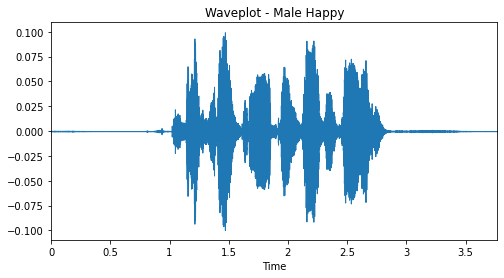

In [ ]:
# DISPLAY WAVEPLOT
x, sr = librosa.load(f'/{audio}/Actor_03/03-01-03-01-01-01-03.wav')

# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Happy')

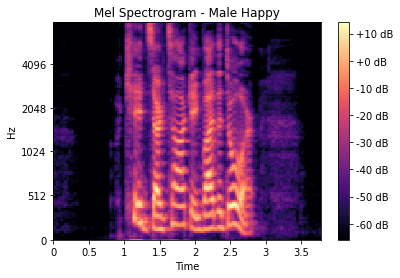

In [ ]:
# CREATE LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
x = librosa.power_to_db(x)

librosa.display.specshow(x, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Happy')
plt.colorbar(format='%+2.0f dB');

### **Male Angry**

Text(0.5, 1.0, 'Waveplot - Male Angry')

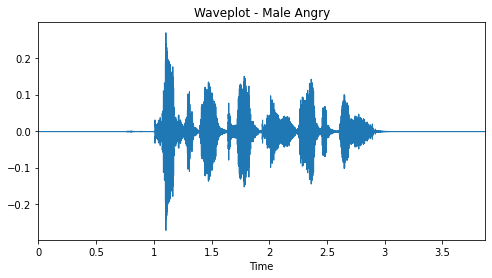

In [ ]:
# LOAD FILE
x, sr = librosa.load(f'/{audio}/Actor_05/03-01-05-01-01-01-05.wav')
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Angry')

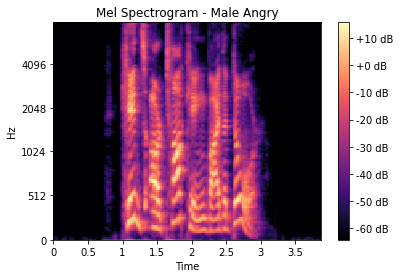

In [ ]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Angry');
plt.colorbar(format='%+2.0f dB');

#### **Female Fearful**

Text(0.5, 1.0, 'Waveplot - Female Fearful')

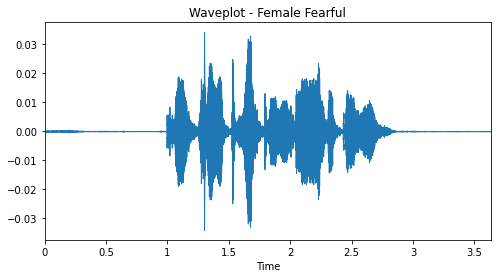

In [ ]:
# LOAD FILE
x, sr = librosa.load(f'/{audio}/Actor_06/03-01-06-01-01-01-06.wav')
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Fearful')

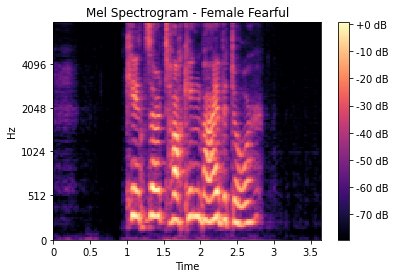

In [ ]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Fearful')
plt.colorbar(format='%+2.0f dB');

#### **Female Surprised**

Text(0.5, 1.0, 'Waveplot - FemaleSurprised')

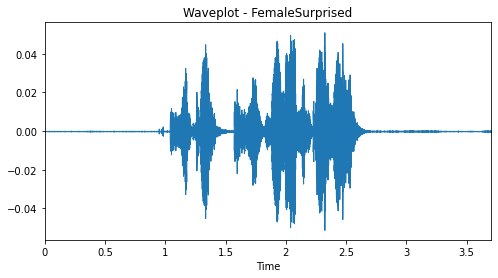

In [ ]:
# LOAD FILE
x, sr = librosa.load(f'/{audio}/Actor_08/03-01-08-01-01-01-08.wav')
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - FemaleSurprised')

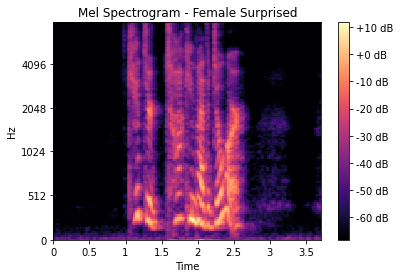

In [ ]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Surprised')
plt.colorbar(format='%+2.0f dB');

**So in above plots we have created a Waveplots and Mel Spectrograms for different emotions classifications.**

In [ ]:
# CREATE DIRECTORY OF AUDIO FILES 
actor_folders = os.listdir(audio) #list files in audio directory
actor_folders.sort() 
actor_folders[0:5]

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05']

**We have converted audio speech files into List dtype.**

In [ ]:
# CREATE FUNCTION TO EXTRACT EMOTION NUMBER, ACTOR AND GENDER LABEL
emotion = []
gender = []
actor = []
file_path = []
for i in actor_folders:
    filename = os.listdir(audio + i) #iterate over Actor folders
    for f in filename: # go through files in Actor folder
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        actor.append(int(part[6]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(audio + i + '/' + f)

In [ ]:
# PUT EXTRACTED LABELS WITH FILEPATH INTO DATAFRAME
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor)],axis=1)
audio_df.columns = ['gender','emotion','actor']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
audio_df.head()

,gender,emotion,actor,path
0,male,neutral,1,/content/drive/MyDrive/Speech-Emotion-Recognit...
1,male,neutral,1,/content/drive/MyDrive/Speech-Emotion-Recognit...
2,male,neutral,1,/content/drive/MyDrive/Speech-Emotion-Recognit...
3,male,neutral,1,/content/drive/MyDrive/Speech-Emotion-Recognit...
4,male,calm,1,/content/drive/MyDrive/Speech-Emotion-Recognit...


**So we have extracted the audio speech files path and created a DataFrame out of it.**

In [ ]:
#shape of the dataframe
audio_df.shape

(1440, 4)

# **Data Visualisation**

###**Count of different types of emotions**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


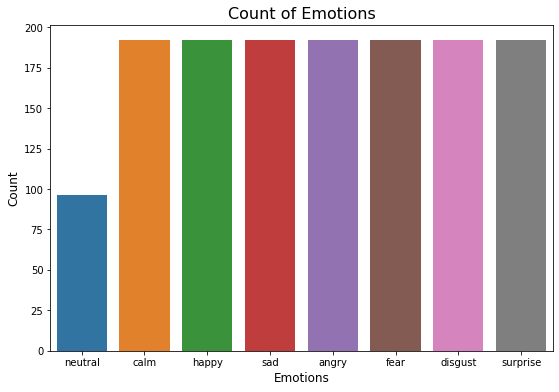

In [ ]:
plt.figure(figsize=(9,6))
plt.title('Count of Emotions', size=16)
sns.countplot(audio_df.emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
# sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

**From the above plot we can see that we have 8 distinct emotions(classifications) in our dataset.**

In [ ]:
# EXPORT TO CSV
audio_df.to_csv('/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/audio.csv')

In [ ]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING 
df = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
    
    #get the mel-scaled spectrogram (transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
    
    df.loc[counter] = [log_spectrogram]
    counter=counter+1

In [ ]:
# TURN ARRAY INTO LIST AND JOIN WITH AUDIO_DF TO GET CORRESPONDING EMOTION LABELS
df_combined = pd.concat([audio_df,pd.DataFrame(df['mel_spectrogram'].values.tolist())],axis=1)
df_combined = df_combined.fillna(0)

In [ ]:
# DROP PATH COLUMN FOR MODELING
df_combined.drop(columns='path',inplace=True)

In [ ]:
# CHECK TOP 5 ROWS
df_combined.head()

,gender,emotion,actor,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258
0,male,neutral,1,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.367455,-76.372063,-76.384773,-76.384773,-76.173912,-75.719101,-75.941528,-75.642616,-75.908943,-75.830963,-75.750702,-74.779770,-72.831291,-71.263046,-66.522675,-66.223503,-70.020477,-72.228935,-72.313690,-73.103096,-73.700745,...,-76.307678,-76.327888,-76.380356,-76.322456,-76.256866,-76.058685,-76.228973,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,male,neutral,1,-75.335518,-75.445320,-75.554031,-75.203949,-75.230530,-75.319374,-75.653793,-75.720039,-75.720039,-75.720039,-75.720039,-75.720039,-75.556015,-75.118057,-75.059258,-75.370628,-75.391228,-75.651840,-75.720039,-75.720039,-75.547119,-75.301353,-75.143791,-75.149933,-75.406776,-72.989136,-65.364212,-66.216202,-71.882805,-61.773552,-55.712582,-54.201565,-59.008545,-65.380852,-71.747086,-73.445030,-74.108345,...,-75.718483,-75.720039,-75.720039,-75.720039,-75.720039,-75.720039,-75.715614,-75.720039,-75.720039,-75.583420,-75.506737,-75.720039,-75.720039,-75.720039,-75.661255,-75.433395,-75.672539,-75.720039,-75.720039,-75.720039,-75.720039,-75.720039,-75.720039,-75.720039,-75.720039,-75.720039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,male,neutral,1,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,-75.139587,-75.072227,-75.150711,-75.150711,-75.150711,-75.150711,-75.099373,-75.150711,-75.150711,-75.150711,-75.109047,-75.094116,-75.150711,-74.928223,-74.151703,-74.198418,-74.515488,-75.119537,-75.103989,-75.131653,-75.150711,-75.150711,-75.149879,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,-75.069016,-74.121017,...,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,-75.112236,-75.101410,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,-74.863907,-74.294701,-74.354446,-74.683067,-74.923653,-74.444016,-74.158699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,male,neutral,1,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.243004,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.245277,-75.045677,-74.991676,-75.199890,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-74.348541,-73.925392,...,-74.795807,-74.800621,-74.906258,-75.227119,-75.110405,-74.772667,-74.482544,-74.728058,-75.072304,-75.161499,-75.264870,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,male,calm,1,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.127945,-80.133469,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-79.741898,-79.204338,-79.975922,-80.147377,-80.118141,-80.035789,-79.775558,-79.230133,-80.020821,-80.147377,-80.118446,-79.994080,-80.137436,-79.885605,-79.754646,-7

**New dataframe after extracting distinct features from the dataset through Mel Spectrogram.**

###**Prepping Data for Modelling**

In [ ]:
# TRAIN TEST SPLIT DATA
train,test = train_test_split(df_combined, test_size=0.2, random_state=0,
                               stratify=df_combined[['emotion','gender','actor']])

In [ ]:
X_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['gender'])
print(X_train.shape)

(1152, 259)


In [ ]:
X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])
print(X_test.shape)

(288, 259)


####**Data Preprocessing**

In [ ]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

**So we have normalized our data for the stable prediction.**

In [ ]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

print(y_test[0:10])

[[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(lb.classes_)

['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [ ]:
# RESHAPE DATA TO INCLUDE 3D TENSOR 
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

X_train.shape

(1152, 259, 1)

##**Initial Model(Base model)**

In [ ]:
#BUILD 1D CNN LAYERS
model = tf.keras.Sequential()
model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(8, activation='sigmoid'))
opt = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 250, 64)           704       
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 241, 128)          82048     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 30, 128)           0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 30, 128)           0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 21, 128)           163968    
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 2, 128)            0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 2, 128)           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# FIT MODEL AND USE CHECKPOINT TO SAVE BEST MODEL
checkpoint = ModelCheckpoint("best_initial_model.hdf5", monitor='val_accuracy', verbose=1,
    save_best_only=True, mode='max', period=1, save_weights_only=True)

model_history=model.fit(X_train, y_train,batch_size=32, epochs=50, validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/50
36/36 [==============================] - 3s 22ms/step - loss: 2.5100 - accuracy: 0.2057 - val_loss: 2.1462 - val_accuracy: 0.2674

Epoch 00001: val_accuracy improved from -inf to 0.26736, saving model to best_initial_model.hdf5
Epoch 2/50
36/36 [==============================] - 0s 12ms/step - loss: 2.0508 - accuracy: 0.2743 - val_loss: 1.9201 - val_accuracy: 0.2882

Epoch 00002: val_accuracy improved from 0.26736 to 0.28819, saving model to best_initial_model.hdf5
Epoch 3/50
36/36 [==============================] - 0s 12ms/step - loss: 1.8786 - accuracy: 0.2917 - val_loss: 1.8301 - val_accuracy: 0.3021

Epoch 00003: val_accuracy improved from 0.28819 to 0.30208, saving model to best_initial_model.hdf5
Epoch 4/50
36/36 [==============================] - 0s 11ms/step - loss: 1.8264 - accuracy: 0.2934 - val_loss: 1.7634 - val_accuracy: 0.3194

Epoch 00004: val_accuracy improved from 0.30208 to 0.31944, saving model to best_initial_model.hdf5
Epoch 5/50
36/36 [=================

####**Model accuracy graph**

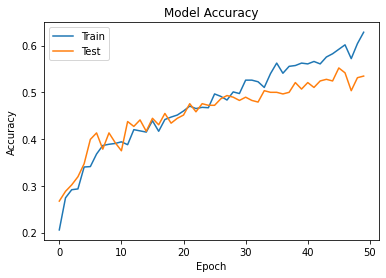

In [ ]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Initial_Model_Accuracy.png')
plt.show()

####**Model loss graph**

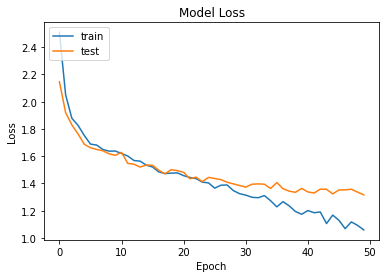

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Initial_Model_loss.png')
plt.show()

#### **Post-Model Analysis**

In [ ]:
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

9/9 [==============================] - 0s 5ms/step - loss: 1.3160 - accuracy: 0.5347
Loss of the model is -  1.3160064220428467
9/9 [==============================] - 0s 5ms/step - loss: 1.3160 - accuracy: 0.5347
Accuracy of the model is -  53.47222089767456 %


####**Actual vs Predicted**

In [ ]:
# PREDICTIONS
predictions = model.predict(X_test)
predictions=predictions.argmax(axis=1)
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions})

# ACTUAL LABELS
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'Actual Values': actual})

# COMBINE BOTH 
finaldf = actual.join(predictions)
finaldf[140:150]

,Actual Values,Predicted Values
140,sad,calm
141,surprise,happy
142,neutral,sad
143,sad,sad
144,fear,surprise
145,sad,sad
146,disgust,disgust
147,angry,angry
148,surprise,happy
149,angry,angry


####**Confusion Matrix**

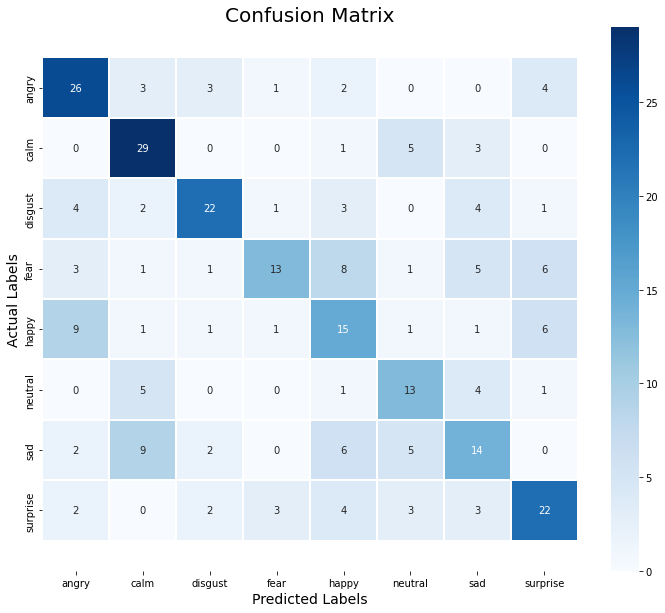

In [ ]:
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION 
cm = confusion_matrix(actual, predictions)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()

In [ ]:
print(classification_report(actual, predictions, target_names = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']))

              precision    recall  f1-score   support

       angry       0.57      0.67      0.61        39
        calm       0.58      0.76      0.66        38
     disgust       0.71      0.59      0.65        37
        fear       0.68      0.34      0.46        38
       happy       0.38      0.43      0.40        35
     neutral       0.46      0.54      0.50        24
         sad       0.41      0.37      0.39        38
    surprise       0.55      0.56      0.56        39

    accuracy                           0.53       288
   macro avg       0.54      0.53      0.53       288
weighted avg       0.55      0.53      0.53       288



#### **Saving Model & Weights**

In [ ]:
tf.keras.models.save_model(model,'/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Models/model.hdf5')

In [ ]:
model.save_weights('/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Models/myModel.h5')

### **Data Augmentation**

### **Importing Libraries**

In [ ]:
# IMPORT NECESSARY LIBRARIES
import librosa
import librosa.display
from tqdm import tqdm

import os, glob, sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
%matplotlib inline

import soundfile as sf
import IPython.display as ipd
from IPython.display import Audio

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

import keras
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
#mounting the google drive to import the dataset

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
audio = "/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/Audio_Speech_Actors/"

####**Loading audio file**

In [ ]:
# READ IN CSV FILE FROM EDA_PREPROCESSING
audio_df=pd.read_csv('/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/audio.csv',usecols=['emotion','path','gender','actor'])
audio_df.head()

,gender,emotion,actor,path
0,male,neutral,1,/content/drive/MyDrive/Speech-Emotion-Recognit...
1,male,neutral,1,/content/drive/MyDrive/Speech-Emotion-Recognit...
2,male,neutral,1,/content/drive/MyDrive/Speech-Emotion-Recognit...
3,male,neutral,1,/content/drive/MyDrive/Speech-Emotion-Recognit...
4,male,calm,1,/content/drive/MyDrive/Speech-Emotion-Recognit...


In [ ]:
# TRAIN TEST SPLIT DATA
train,test = train_test_split(audio_df, test_size=0.2, random_state=0,
                               stratify=audio_df[['emotion','gender','actor']])

In [ ]:
X_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['gender'])
print(X_train.shape)

(1152, 1)


# **Data Augmentation**

#### **Add Noise, Stretch, Speed and Pitch to Original Audio File**

Text(0.5, 1.0, 'Waveplot - Male happy')

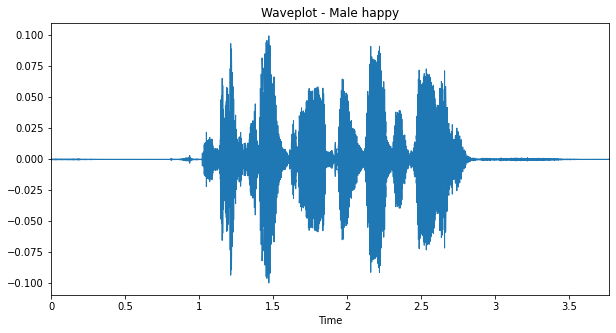

In [ ]:
# MALE Happy ORIGINAL AUDIO FILE
fname = audio + 'Actor_03/03-01-03-01-01-01-03.wav'  
X, sr = librosa.load(fname)
plt.figure(figsize=(10, 5))
librosa.display.waveplot(X, sr=sr)
plt.title('Waveplot - Male happy')

In [ ]:
# FUNCTION TO ADD WHITE NOISE
def noise(x):
    noise_amp = 0.05*np.random.uniform()*np.amax(x)   
    x = x.astype('float64') + noise_amp * np.random.normal(size=x.shape[0])
    return x

###**Noise**

Text(0.5, 1.0, 'Waveplot - Noise Male Happy')

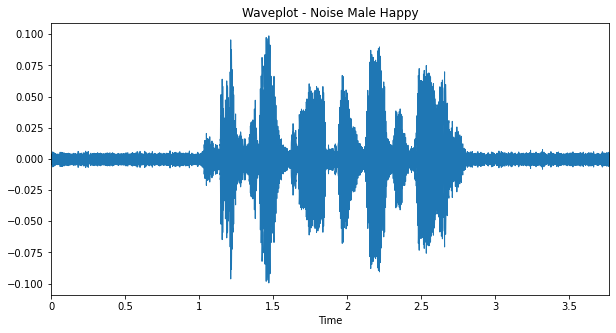

In [ ]:
# ADD NOISE TO MALE Happy ORIGINAL AUDIO FILE
x = noise(X)
plt.figure(figsize=(10, 5))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Noise Male Happy')

###**Stretch**

In [ ]:
# FUNCTION TO STRETCH THE SOUND
def stretch(x, rate=0.8):
    data = librosa.effects.time_stretch(x, rate)
    return data

Text(0.5, 1.0, 'Waveplot - Stretch Male Happy')

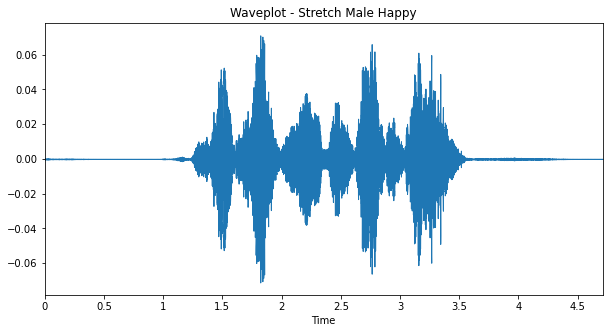

In [ ]:
# ADD STRETCH TO MALE Happy ORIGINAL AUDIO FILE
x = stretch(X)
plt.figure(figsize=(10, 5))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Stretch Male Happy')

###**Speed N Pitch**

In [ ]:
# FUNCTION TO INCREASE SPEED AND PITCH 
def speedNpitch(x):
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.4  / length_change 
    tmp = np.interp(np.arange(0,len(x),speed_fac),np.arange(0,len(x)),x)
    minlen = min(x.shape[0], tmp.shape[0])
    x *= 0
    x[0:minlen] = tmp[0:minlen]
    return x

Text(0.5, 1.0, 'Waveplot - Speed and Pitch Male Happy')

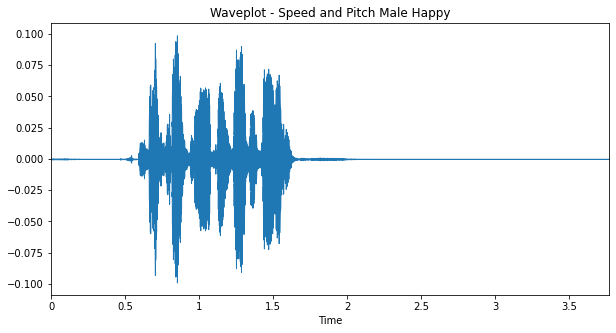

In [ ]:
# ADD SPEED AND PITCH TO MALE Happy ORIGINAL AUDIO FILE
x = speedNpitch(X)
plt.figure(figsize=(10, 5))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Speed and Pitch Male Happy')

**The above shown all distints waveplots have been created after adding Noise, Stretch, Speed and Pitch to Original Audio File.**

####**Apply Data Augmentation Methods to Train Set**

In [ ]:
# FEATURE EXTRACTION ON RAW AUDIO FILES
df = pd.DataFrame(columns=['log_spec'])
counter=0

for index,path in enumerate(train.path):
    #get wave representation
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
    
    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
    df.loc[counter] = [log_spectrogram]   
    counter += 1
print(len(df))
df.head()

1152


,log_spec
0,"[-52.010284, -52.010284, -52.010284, -52.01028..."
1,"[-67.44706, -67.421036, -67.53507, -67.25538, ..."
2,"[-68.620384, -68.49013, -68.54058, -68.60243, ..."
3,"[-45.199844, -43.82312, -44.344078, -45.735817..."
4,"[-60.652348, -60.72612, -60.604263, -60.55492,..."


In [ ]:
# ADD NOISE AND USE FEATURE EXTRACTION
df_noise = pd.DataFrame(columns=['feature'])
counter=0
for index,path in enumerate(train.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
        # noise 
    aug = noise(X)
    aug = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(aug)
    aug=np.mean(db_spec,axis=0)
    df_noise.loc[counter] = [aug]
    counter +=1
print(len(df_noise))
df_noise.head()

1152


,feature
0,"[-52.010284, -52.010284, -52.010284, -52.01028..."
1,"[-67.44706, -67.421036, -67.53507, -67.25538, ..."
2,"[-68.620384, -68.49013, -68.54058, -68.60243, ..."
3,"[-45.199844, -43.82312, -44.344078, -45.735817..."
4,"[-60.652348, -60.72612, -60.604263, -60.55492,..."


In [ ]:
# ADD SPEED AND PITCH THEN USE FEATURE EXTRACTION
df_speedpitch = pd.DataFrame(columns=['feature'])
counter=0
for index,path in enumerate(train.path):
    #get wave representation
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
        # speed pitch
    aug = speedNpitch(X)
    aug = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(aug)
    aug=np.mean(db_spec,axis=0)
    df_speedpitch.loc[counter] = [aug] 
    counter +=1
print(len(df_speedpitch))
df_speedpitch.head()

1152


,feature
0,"[-55.0786, -55.0786, -55.0786, -55.0786, -55.0..."
1,"[-69.17061, -69.24174, -68.970436, -68.93122, ..."
2,"[-69.46083, -69.471176, -69.64659, -69.78886, ..."
3,"[-46.771294, -45.63209, -47.175415, -47.37178,..."
4,"[-61.006573, -60.935555, -60.86041, -61.016357..."


In [ ]:
# ADD STRETCH AND USE FEATURE EXTRACTION ON AUDIO FILES
df_stretch=pd.DataFrame(columns=['feature'])
counter=0
for index,path in enumerate(train.path):
    #get wave representation
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
        # stretch
    aug= stretch(X)
    aug = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(aug)
    aug=np.mean(db_spec,axis=0)
    df_stretch.loc[counter] = [aug] 
    counter +=1
print(len(df_stretch))
df_stretch.head()

1152


,feature
0,"[-52.010284, -52.010284, -52.010284, -52.01028..."
1,"[-67.44706, -67.421036, -67.53507, -67.25538, ..."
2,"[-68.620384, -68.49013, -68.54058, -68.60243, ..."
3,"[-45.199844, -43.82312, -44.344078, -45.735817..."
4,"[-60.652348, -60.72612, -60.604263, -60.55492,..."


###**Combine Tables For Modeling**

In [ ]:
# EXTRACT EMOTION LABELS FROM TRAIN
labels = train.emotion
labels.reset_index(drop=True, inplace=True)
labels

0          angry
1       surprise
2       surprise
3       surprise
4       surprise
          ...   
1147       angry
1148         sad
1149         sad
1150        calm
1151        fear
Name: emotion, Length: 1152, dtype: object

In [ ]:
# ADD CORRESPONDING EMOTION LABELS TO DF['LOG_SPEC']
mfcc_df = pd.DataFrame(df['log_spec'].values.tolist())
mfcc = pd.concat([mfcc_df,labels], axis=1,ignore_index=True)
mfcc = mfcc.rename(index=str, columns={259: "emotion"})

In [ ]:
# ADD CORRESPONDING EMOTION LABELS TO DF_NOISE['FEATURE']
noise_df = pd.DataFrame(df_noise['feature'].values.tolist())
noise = pd.concat([noise_df,labels], axis=1)
noise = noise.rename(index=str, columns={259: "label"})

In [ ]:
# ADD CORRESPONDING EMOTION LABELS TO DF_SPEEDPITCH['FEATURE']
speedpitch_df = pd.DataFrame(df_speedpitch['feature'].values.tolist())
speedpitch = pd.concat([speedpitch_df,labels], axis=1)
speedpitch = speedpitch.rename(index=str, columns={259: "label"})

In [ ]:
# ADD CORRESPONDING EMOTION LABELS TO DF_STRETCH['FEATURE']
stretch_df = pd.DataFrame(df_stretch['feature'].values.tolist())
stretch = pd.concat([stretch_df,labels], axis=1)
stretch = stretch.rename(index=str, columns={259: "label"})

In [ ]:
# JOIN FOUR DATA FRAMES FOR MODELING
combined_df = pd.concat([mfcc, noise, speedpitch,stretch], ignore_index=True)
combined_df = combined_df.fillna(0)
combined_df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,emotion
4603,-55.350864,-54.635700,-54.561180,-55.446121,-55.953434,-56.111580,-56.143040,-56.143040,-56.092976,-56.070923,-55.837639,-55.461178,-55.180954,-54.755665,-54.635277,-54.614250,-53.847015,-53.324734,-52.871319,-53.313087,-53.552021,-52.871544,-52.775070,-53.566254,-53.544525,-53.539707,-53.628799,-53.863235,-53.895973,-54.010418,-54.609024,-55.256470,-55.954945,-55.915829,-54.567009,-53.281651,-54.843540,-55.983639,-56.038185,-55.888046,...,-52.065670,-52.912498,-54.112488,-54.965298,-55.177380,-55.051971,-55.015125,-55.390179,-55.677193,-55.826939,-55.737907,-55.863113,-55.864239,-55.914230,-55.863487,-55.762634,-55.820210,-55.763981,-55.911430,-56.054672,-55.780342,-55.605019,-55.884808,-55.968689,-56.066998,-56.063118,-55.853905,-55.986694,-56.132336,-55.959827,-55.757290,-55.860142,-55.975815,-55.939114,-56.025181,-55.984623,-56.052174,-56.140205,-56.143040,angry
4604,-67.904999,-67.943665,-68.031281,-67.961525,-67.885712,-68.044617,-68.102264,-68.009331,-67.908081,-67.852127,-67.826080,-67.854218,-67.916046,-67.852341,-67.747726,-67.616707,-67.563263,-67.750916,-67.807335,-67.913963,-67.850807,-67.777771,-67.733612,-67.516556,-67.544556,-67.591835,-67.683395,-67.733131,-67.563568,-67.456703,-67.475227,-67.634338,-67.741547,-67.754807,-67.704208,-67.636078,-67.336983,-67.099083,-67.146576,-67.242645,...,-66.605476,-66.719521,-66.702751,-66.822441,-66.854431,-67.055389,-67.157471,-66.545044,-65.772888,-66.506645,-66.979485,-67.454575,-67.475533,-67.283409,-67.323120,-67.312569,-67.190186,-67.264610,-67.399002,-67.482773,-67.041161,-67.122787,-67.339409,-67.712708,-67.639633,-67.824875,-67.977013,-68.082054,-67.831108,-67.739334,-67.771706,-67.718842,-67.534889,-67.411179,-67.642990,-67.714569,-67.876793,-67.729774,-67.574707,sad
4605,-76.469704,-76.469704,-76.469704,-76.469704,-76.469704,-76.051636,-76.397690,-76.469704,-76.469704,-76.469704,-76.469704,-76.469704,-76.469704,-76.469704,-76.469704,-76.469704,-76.469704,-76.469704,-76.469704,-76.469704,-76.469704,-76.469704,-76.469704,-76.366440,-76.316292,-76.416199,-76.413208,-76.452896,-76.463272,-76.251457,-70.802765,-66.573860,-69.319893,-75.360588,-76.038933,-75.608093,-76.196800,-76.469704,-76.462555,-75.663864,...,-74.417252,-75.479179,-75.440849,-74.280731,-73.702866,-74.087311,-75.119919,-75.952515,-76.000648,-75.900757,-76.460793,-76.108528,-75.918953,-76.254425,-76.452103,-76.469704,-76.469704,-76.469704,-76.469704,-76.320038,-75.842918,-76.273933,-76.457382,-76.469704,-76.469704,-76.469704,-76.469704,-76.469704,-76.469704,-76.425140,-76.464203,-76.469704,-76.469704,-76.469704,-76.469704,-76.469704,-76.469704,-76.469704,-76.469704,sad
4606,-82.734825,-79.602737,-77.126938,-76.456169,-77.006424,-76.750793,-76.038513,-75.667809,-75.560844,-76.109756,-76.688545,-76.029724,-75.892525,-76.792915,-76.188705,-76.303169,-76.318810,-76.825928,-76.765640,-75.886887,-77.444489,-77.863411,-77.443199,-75.764847,-75.635864,-76.050926,-76.237503,-77.023804,-77.537193,-77.304428,-77.089622,-78.626511,-79.294373,-79.729538,-79.525146,-78.528641,-78.514740,-73.506432,-69.834435,-70.673737,...,-79.833107,-79.923798,-79.980019,-80.323219,-80.426697,-79.812782,-80.135620,-81.077034,-81.554451,-81.406403,-80.616661,-83.001221,-82.094788,-80.843346,-81.692360,-80.854187,-80.040375,-80.212898,-80.102325,-79.942970,-80.434311,-81.430687,-82.221893,-83.138313,-81.518059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,calm
4607,-70.372475,-70.616646,-70.727432,-70.727432,-70.727432,-70.671021,-70.727432,-70.727432,-70.727432,-70.727432,-70.727432,-70.727432,-70.727432,-70.727432,-70.673653,-70.652382,-70.727432,-70.713852,-70.487106,-70.

**The new Dataframe after implementing data augmentation technique and extracting distinct features by using Mel spectrogram.**

In [ ]:
mfcc.shape,noise.shape,speedpitch.shape,stretch.shape

((1152, 260), (1152, 260), (1152, 260), (1152, 260))

In [ ]:
X_train = combined_df.iloc[:, :-1]
y_train = combined_df.iloc[:, -1:]

###**Feature Extraction for Test Set**

In [ ]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING 
df = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(test.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
    
    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
    
    df.loc[counter] = [log_spectrogram]
    counter=counter+1   

print(len(df))
df.head()

288


,mel_spectrogram
0,"[-52.76322, -52.76322, -52.76322, -52.76322, -..."
1,"[-58.98776, -57.910664, -56.494076, -55.62374,..."
2,"[-52.238705, -52.015965, -51.746494, -51.12382..."
3,"[-52.10011, -52.10011, -52.10011, -52.10011, -..."
4,"[-60.917233, -60.655, -59.86959, -59.600014, -..."


In [ ]:
test.reset_index(drop=True,inplace=True)

In [ ]:
# TURN ARRAY INTO LIST AND JOIN WITH AUDIO_DF TO GET CORRESPONDING EMOTION LABELS
df_combined = pd.concat([test,pd.DataFrame(df['mel_spectrogram'].values.tolist())],axis=1)
df_combined = df_combined.fillna(0)
df_combined.head()

,gender,emotion,actor,path,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258
0,female,fear,4,/content/drive/MyDrive/Speech-Emotion-Recognit...,-52.763222,-52.763222,-52.763222,-52.763222,-52.763222,-52.763222,-52.763222,-52.763222,-52.763222,-52.763222,-52.763222,-52.763222,-52.763222,-52.370380,-48.526329,-46.132549,-46.496235,-43.014095,-39.407925,-36.384762,-33.940887,-32.375683,-31.924116,-30.061274,-28.563995,-27.221067,-26.194651,-25.706356,-25.741217,-25.398100,-25.468767,-25.263351,-25.120495,-25.066256,-24.764282,-24.523005,...,-52.471634,-52.560459,-52.667191,-52.507000,-52.633717,-52.622929,-52.666950,-52.726643,-52.694691,-52.699741,-52.717453,-52.716175,-52.763222,-52.763222,-52.734112,-52.324459,-50.826057,-48.627930,-45.780178,-44.213753,-42.764778,-42.169403,-41.972843,-42.109455,-42.809196,-42.114136,-41.616962,-41.727291,-42.094898,-43.239326,-44.213104,-44.874271,-44.891907,-45.049019,-45.912987,-46.570332,-47.174248,-47.970875,-48.438820,-49.576263
1,male,calm,21,/content/drive/MyDrive/Speech-Emotion-Recognit...,-58.987759,-57.910664,-56.494076,-55.623741,-54.973011,-54.715092,-53.624565,-52.490383,-52.477627,-53.271507,-53.286102,-52.597729,-52.777752,-52.737080,-52.267227,-52.811451,-52.940254,-53.069847,-52.936340,-52.841949,-53.464386,-54.204220,-54.856651,-55.095219,-55.324009,-56.367130,-55.932522,-55.543495,-56.845787,-57.704430,-58.272678,-60.643799,-62.298260,-63.971146,-66.091515,-68.738525,...,-51.031349,-51.099075,-50.368759,-49.670712,-49.856007,-50.820255,-53.462692,-56.137756,-58.297283,-59.667416,-60.692421,-61.237411,-62.200611,-62.271305,-61.871078,-61.295532,-61.538258,-61.972263,-63.418049,-63.521126,-63.601337,-63.059910,-63.996387,-63.792397,-64.265656,-64.348557,-64.659424,-65.050598,-64.904655,-65.535988,-66.325829,-66.646477,-66.721275,-67.368301,-67.622253,-68.267868,-68.893929,-70.283516,-70.107117,-69.970970
2,female,happy,16,/content/drive/MyDrive/Speech-Emotion-Recognit...,-52.238705,-52.015965,-51.746494,-51.123821,-50.795700,-50.652802,-50.606216,-49.770161,-48.881454,-48.102070,-47.558136,-46.562859,-44.483524,-43.863712,-43.760994,-42.293789,-41.432037,-40.455231,-39.664673,-39.315807,-39.780285,-39.374916,-39.488144,-39.586868,-39.545719,-37.960365,-38.379356,-39.974846,-42.130711,-44.124516,-46.244110,-48.209785,-50.659332,-52.374828,-51.882252,-51.987167,...,-53.116100,-53.208244,-53.232944,-53.194000,-53.176147,-53.232944,-53.232944,-53.232944,-53.232944,-53.217716,-53.167305,-53.195232,-53.232498,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.230541,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944
3,female,angry,12,/content/drive/MyDrive/Speech-Emotion-Recognit...,-52.100109,-52.100109,-52.100109,-52.100109,-52.100109,-52.100109,-52.100109,-52.100109,-52.100109,-52.100109,-52.047100,-51.851395,-51.810146,-51.825302,-51.442062,-50.395355,-49.357246,-48.650845,-47.611759,-45.855061,-44.482426,-44.376381,-43.918308,-42.559498,-37.760391,-37.654011,-41.902580,-41.855984,-41.126366,-40.958714,-41.220043,-41.096748,-41.059223,-41.465546,-40.573189,-39.823734,...,-50.529358,-50.600750,-51.206085,-51.601494,-51.394314,-51.372200,-51.411369,-51.544453,-51.723881,-51.947437,-51.743874,-51.722435,-51.548649,-51.690319,-51.715443,-51.700069,-51.813698,-51.872246,-51.805237,-51.775276,-51.787823,-51.788902,-51.755516,-51.787189,-51.755344,-51.717602,-51.747890,-51.507721,-51.339260,-51.300564,-51.312187,-51.426300,-51.391220,-51.352646,-51.349068,-51.352383,-51.363049,-51.370937,-51.395046,-51.481194
4,male,fear,23,/content/drive/MyDrive/Speech-Emotion-Recognit...,-60.917233,-60.6549

In [ ]:
# DROP PATH COLUMN FOR MODELING
df_combined.drop(columns='path',inplace=True)

# **From here we need to run the cells again**

In [ ]:
df_combined.head()

,gender,emotion,actor,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258
0,female,fear,4,-52.763222,-52.763222,-52.763222,-52.763222,-52.763222,-52.763222,-52.763222,-52.763222,-52.763222,-52.763222,-52.763222,-52.763222,-52.763222,-52.370380,-48.526329,-46.132549,-46.496235,-43.014095,-39.407925,-36.384762,-33.940887,-32.375683,-31.924116,-30.061274,-28.563995,-27.221067,-26.194651,-25.706356,-25.741217,-25.398100,-25.468767,-25.263351,-25.120495,-25.066256,-24.764282,-24.523005,-25.462490,...,-52.471634,-52.560459,-52.667191,-52.507000,-52.633717,-52.622929,-52.666950,-52.726643,-52.694691,-52.699741,-52.717453,-52.716175,-52.763222,-52.763222,-52.734112,-52.324459,-50.826057,-48.627930,-45.780178,-44.213753,-42.764778,-42.169403,-41.972843,-42.109455,-42.809196,-42.114136,-41.616962,-41.727291,-42.094898,-43.239326,-44.213104,-44.874271,-44.891907,-45.049019,-45.912987,-46.570332,-47.174248,-47.970875,-48.438820,-49.576263
1,male,calm,21,-58.987759,-57.910664,-56.494076,-55.623741,-54.973011,-54.715092,-53.624565,-52.490383,-52.477627,-53.271507,-53.286102,-52.597729,-52.777752,-52.737080,-52.267227,-52.811451,-52.940254,-53.069847,-52.936340,-52.841949,-53.464386,-54.204220,-54.856651,-55.095219,-55.324009,-56.367130,-55.932522,-55.543495,-56.845787,-57.704430,-58.272678,-60.643799,-62.298260,-63.971146,-66.091515,-68.738525,-71.474281,...,-51.031349,-51.099075,-50.368759,-49.670712,-49.856007,-50.820255,-53.462692,-56.137756,-58.297283,-59.667416,-60.692421,-61.237411,-62.200611,-62.271305,-61.871078,-61.295532,-61.538258,-61.972263,-63.418049,-63.521126,-63.601337,-63.059910,-63.996387,-63.792397,-64.265656,-64.348557,-64.659424,-65.050598,-64.904655,-65.535988,-66.325829,-66.646477,-66.721275,-67.368301,-67.622253,-68.267868,-68.893929,-70.283516,-70.107117,-69.970970
2,female,happy,16,-52.238705,-52.015965,-51.746494,-51.123821,-50.795700,-50.652802,-50.606216,-49.770161,-48.881454,-48.102070,-47.558136,-46.562859,-44.483524,-43.863712,-43.760994,-42.293789,-41.432037,-40.455231,-39.664673,-39.315807,-39.780285,-39.374916,-39.488144,-39.586868,-39.545719,-37.960365,-38.379356,-39.974846,-42.130711,-44.124516,-46.244110,-48.209785,-50.659332,-52.374828,-51.882252,-51.987167,-52.651463,...,-53.116100,-53.208244,-53.232944,-53.194000,-53.176147,-53.232944,-53.232944,-53.232944,-53.232944,-53.217716,-53.167305,-53.195232,-53.232498,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.230541,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944,-53.232944
3,female,angry,12,-52.100109,-52.100109,-52.100109,-52.100109,-52.100109,-52.100109,-52.100109,-52.100109,-52.100109,-52.100109,-52.047100,-51.851395,-51.810146,-51.825302,-51.442062,-50.395355,-49.357246,-48.650845,-47.611759,-45.855061,-44.482426,-44.376381,-43.918308,-42.559498,-37.760391,-37.654011,-41.902580,-41.855984,-41.126366,-40.958714,-41.220043,-41.096748,-41.059223,-41.465546,-40.573189,-39.823734,-39.064079,...,-50.529358,-50.600750,-51.206085,-51.601494,-51.394314,-51.372200,-51.411369,-51.544453,-51.723881,-51.947437,-51.743874,-51.722435,-51.548649,-51.690319,-51.715443,-51.700069,-51.813698,-51.872246,-51.805237,-51.775276,-51.787823,-51.788902,-51.755516,-51.787189,-51.755344,-51.717602,-51.747890,-51.507721,-51.339260,-51.300564,-51.312187,-51.426300,-51.391220,-51.352646,-51.349068,-51.352383,-51.363049,-51.370937,-51.395046,-51.481194
4,male,fear,23,-60.917233,-60.654999,-59.869591,-59.600014,-59.231213,-59.132954,-58.666348,-58.788391,-58.587650,-57.708721,-57.701057,-57.043739,-56.381603,-55.606079,-55.375004,-55.713066,-56.093185,-56.315361,-55.644821,-56.170410,-56.350

In [ ]:
# SEPARATE DF_COMBINED INTO X_TEST AND Y_TEST
X_test = df_combined.iloc[:, 3:]
y_test = df_combined.iloc[:,:2].drop(columns=['gender'])

####**Data Preprocessing**

In [ ]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [ ]:
# TURN INTO ARRAYS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
# ONE HOT ENCODE EMOTION LABELS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# RESHAPE TO ADD 3D TENSOR FOR 1D CNN INPUT
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]
X_train.shape,X_test.shape

((4608, 259, 1), (288, 259, 1))

# **Modelling**

###**CNN**

In [ ]:
# BUILD 1D CNN LAYERS
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# BUILD 1D CNN LAYERS
model = Sequential()
model.add(Conv1D(64, kernel_size=(20), activation='relu', input_shape=(X_train.shape[1],1)))

model.add(Conv1D(128, kernel_size=(20),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.2))

model.add(Conv1D(128, kernel_size=(20),activation='relu'))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))
model.summary()
opt = tf.keras.optimizers.Adam(lr=0.0001, decay=1e-6)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 240, 64)           1344      
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 221, 128)          163968    
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 27, 128)           0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 27, 128)           0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 8, 128)            327808    
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 1, 128)           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
checkpoint = ModelCheckpoint('face_detector.h15', monitor= 'val_loss', mode= 'min', save_best_only = True, verbose= 1)

# FIT MODEL
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train,batch_size=8, epochs=80, validation_data=(X_test, y_test),callbacks=checkpoint)

Epoch 1/80
576/576 [==============================] - 6s 9ms/step - loss: 2.3078 - accuracy: 0.2862 - val_loss: 1.9802 - val_accuracy: 0.3646

Epoch 00001: val_loss improved from inf to 1.98019, saving model to face_detector.h15
INFO:tensorflow:Assets written to: face_detector.h15/assets
Epoch 2/80
576/576 [==============================] - 5s 9ms/step - loss: 1.8886 - accuracy: 0.3401 - val_loss: 1.7352 - val_accuracy: 0.3993

Epoch 00002: val_loss improved from 1.98019 to 1.73524, saving model to face_detector.h15
INFO:tensorflow:Assets written to: face_detector.h15/assets
Epoch 3/80
576/576 [==============================] - 5s 9ms/step - loss: 1.7198 - accuracy: 0.3800 - val_loss: 1.6725 - val_accuracy: 0.3854

Epoch 00003: val_loss improved from 1.73524 to 1.67245, saving model to face_detector.h15
INFO:tensorflow:Assets written to: face_detector.h15/assets
Epoch 4/80
576/576 [==============================] - 5s 9ms/step - loss: 1.6248 - accuracy: 0.3924 - val_loss: 1.5610 - val_

####**Model accuracy graph**

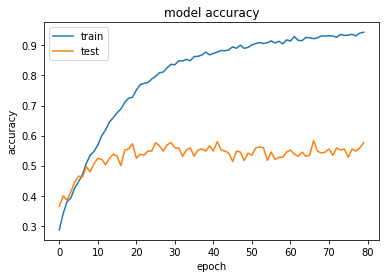

In [ ]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Augmented_Model_Accuracy.png')
plt.show()

####**Model loss graph**

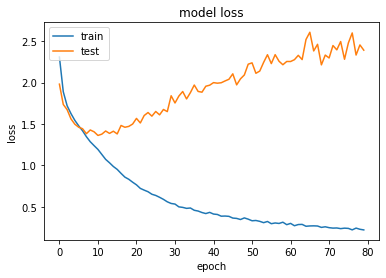

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Augmented_Model_Loss.png')
plt.show()

####**Actual vs Predicted**

In [ ]:
# PREDICTION LABELS
predictions = model.predict(X_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions})

# ACTUAL LABELS
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'Actual Values': actual})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = actual.join(predictions)
finaldf[140:150]

,Actual Values,Predicted Values
140,sad,sad
141,surprise,disgust
142,neutral,calm
143,sad,sad
144,fear,fear
145,sad,happy
146,disgust,disgust
147,angry,angry
148,surprise,surprise
149,angry,angry


####**Confusion Matrix**

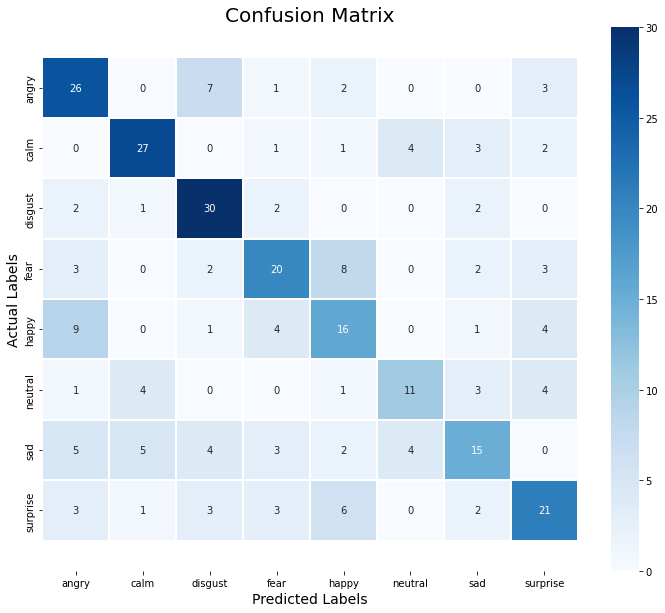

In [ ]:
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION 
cm = confusion_matrix(actual, predictions)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig('Augmented_Model_Confusion_Matrix.png')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(actual, predictions, target_names = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']))

              precision    recall  f1-score   support

       angry       0.53      0.67      0.59        39
        calm       0.71      0.71      0.71        38
     disgust       0.64      0.81      0.71        37
        fear       0.59      0.53      0.56        38
       happy       0.44      0.46      0.45        35
     neutral       0.58      0.46      0.51        24
         sad       0.54      0.39      0.45        38
    surprise       0.57      0.54      0.55        39

    accuracy                           0.58       288
   macro avg       0.57      0.57      0.57       288
weighted avg       0.58      0.58      0.57       288



In [ ]:
tf.keras.models.save_model(model,'/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Models/aug_model.hdf5')

In [ ]:
model.save_weights('/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Models/aug_weights.h5')

### **Importing Libraries**

In [ ]:
# IMPORT NECESSARY LIBRARIES
import librosa
import librosa.display

import os, glob, sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
%matplotlib inline

from sklearn.model_selection import train_test_split

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
#mounting the google drive to import the dataset

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


###**Reading Audio File**

In [ ]:
audio = "/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/Audio_Speech_Actors/"

In [ ]:
audio_df=pd.read_csv('/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/audio.csv')

In [ ]:
audio_df.head()

,Unnamed: 0,gender,emotion,actor,path
0,0,male,neutral,1,/content/drive/MyDrive/Speech-Emotion-Recognit...
1,1,male,neutral,1,/content/drive/MyDrive/Speech-Emotion-Recognit...
2,2,male,neutral,1,/content/drive/MyDrive/Speech-Emotion-Recognit...
3,3,male,neutral,1,/content/drive/MyDrive/Speech-Emotion-Recognit...
4,4,male,calm,1,/content/drive/MyDrive/Speech-Emotion-Recognit...


In [ ]:
audio_df=audio_df.drop('Unnamed: 0',axis=1)

In [ ]:
audio_df.head()

,gender,emotion,actor,path
0,male,neutral,1,/content/drive/MyDrive/Speech-Emotion-Recognit...
1,male,neutral,1,/content/drive/MyDrive/Speech-Emotion-Recognit...
2,male,neutral,1,/content/drive/MyDrive/Speech-Emotion-Recognit...
3,male,neutral,1,/content/drive/MyDrive/Speech-Emotion-Recognit...
4,male,calm,1,/content/drive/MyDrive/Speech-Emotion-Recognit...


In [ ]:
# TRAIN TEST SPLIT DATA
train,test = train_test_split(audio_df, test_size=0.2, random_state=0,
                               stratify=audio_df[['emotion','gender','actor']])

In [ ]:
#top 5 rows
test.head()

,gender,emotion,actor,path
220,female,fear,4,/content/drive/MyDrive/Speech-Emotion-Recognit...
1211,male,calm,21,/content/drive/MyDrive/Speech-Emotion-Recognit...
917,female,happy,16,/content/drive/MyDrive/Speech-Emotion-Recognit...
695,female,angry,12,/content/drive/MyDrive/Speech-Emotion-Recognit...
1360,male,fear,23,/content/drive/MyDrive/Speech-Emotion-Recognit...


In [ ]:
# top 5 rows
train.head()

,gender,emotion,actor,path
692,female,angry,12,/content/drive/MyDrive/Speech-Emotion-Recognit...
472,female,surprise,8,/content/drive/MyDrive/Speech-Emotion-Recognit...
1312,female,surprise,22,/content/drive/MyDrive/Speech-Emotion-Recognit...
1439,female,surprise,24,/content/drive/MyDrive/Speech-Emotion-Recognit...
896,male,surprise,15,/content/drive/MyDrive/Speech-Emotion-Recognit...


In [ ]:
len(train[train['emotion']=='neutral'])

72

In [ ]:
len(test[test['emotion']=='neutral'])

24

### **Making Train_logmel folder**

**Converting training audio files to spectogram images and storing it in drive**

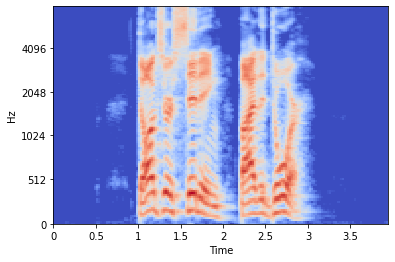

In [ ]:
counter=0
for index,path in enumerate(train.path):
  if train.iloc[counter,1]=='angry':
    x, sr = librosa.load(path)
    x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000)
    y = librosa.power_to_db(x)
    librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
    plt.savefig(f'/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/train_logmel/angry/{counter}.png')
  counter=counter+1

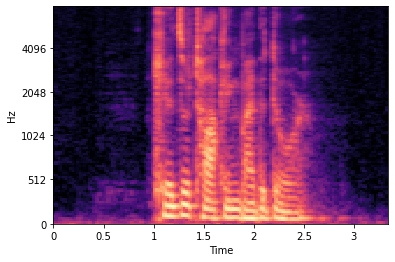

In [ ]:
counter=0
for index,path in enumerate(train.path):
  if train.iloc[counter,1]=='calm':
    x, sr = librosa.load(path)
    x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000)
    y = librosa.power_to_db(x)
    librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
    plt.savefig(f'/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/train_logmel/calm/{counter}.png')
  counter=counter+1

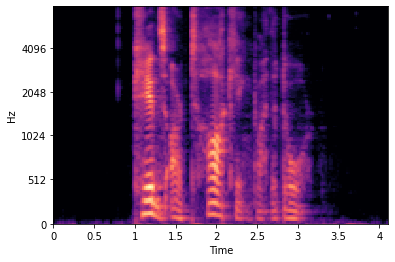

In [ ]:
counter=0
for index,path in enumerate(train.path):
  if train.iloc[counter,1]=='disgust':
    x, sr = librosa.load(path)
    x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000)
    y = librosa.power_to_db(x)
    librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
    plt.savefig(f'/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/train_logmel/disgust/{counter}.png')
  counter=counter+1

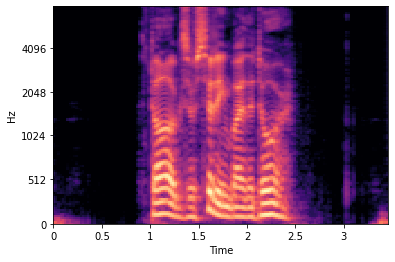

In [ ]:
counter=0
for index,path in enumerate(train.path):
  if train.iloc[counter,1]=='fear':
    x, sr = librosa.load(path)
    x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000)
    y = librosa.power_to_db(x)
    librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
    plt.savefig(f'/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/train_logmel/fearful/{counter}.png')
  counter=counter+1

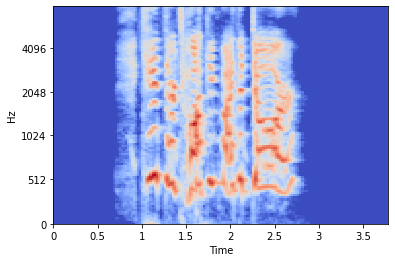

In [ ]:
counter=0
for index,path in enumerate(train.path):
  if train.iloc[counter,1]=='happy':
    x, sr = librosa.load(path)
    x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000)
    y = librosa.power_to_db(x)
    librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
    plt.savefig(f'/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/train_logmel/happy/{counter}.png')
  counter=counter+1

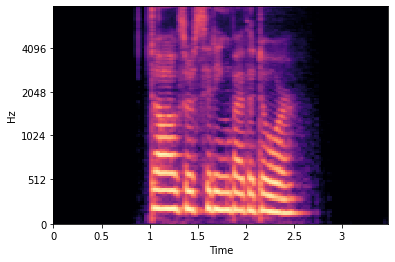

In [ ]:
counter=0
for index,path in enumerate(train.path):
  if train.iloc[counter,1]=='neutral':
    x, sr = librosa.load(path)
    x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000)
    y = librosa.power_to_db(x)
    librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
    plt.savefig(f'/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/train_logmel/neutral/{counter}.png')
  counter=counter+1

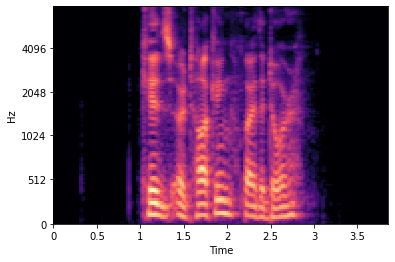

In [ ]:
counter=0
for index,path in enumerate(train.path):
  if train.iloc[counter,1]=='sad':
    x, sr = librosa.load(path)
    x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000)
    y = librosa.power_to_db(x)
    librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
    plt.savefig(f'/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/train_logmel/sad/{counter}.png')
  counter=counter+1

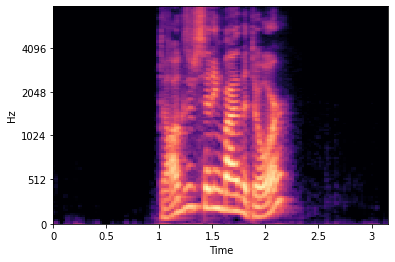

In [ ]:
counter=0
for index,path in enumerate(train.path):
  if train.iloc[counter,1]=='surprise':
    x, sr = librosa.load(path)
    x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000)
    y = librosa.power_to_db(x)
    librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
    plt.savefig(f'/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/train_logmel/surprised/{counter}.png')
  counter=counter+1

### **Making Test_logmel folder**

**Converting testing audio files to spectogram images and storing it in drive**

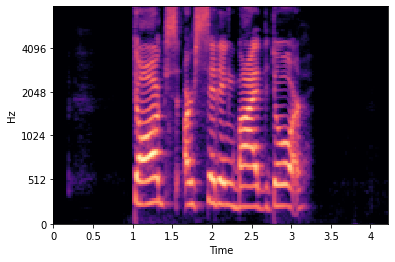

In [ ]:
counter=0
for index,path in enumerate(test.path):
  if test.iloc[counter,1]=='angry':
    x, sr = librosa.load(path)
    x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000)
    y = librosa.power_to_db(x)
    librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
    plt.savefig(f'/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/test_logmel/angry/{counter}.png')
  counter=counter+1

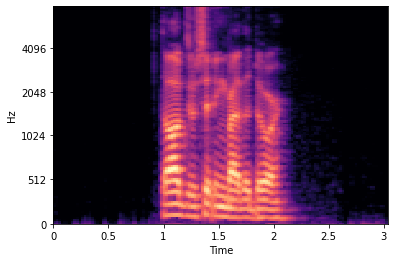

In [ ]:
counter=0
for index,path in enumerate(test.path):
  if test.iloc[counter,1]=='calm':
    x, sr = librosa.load(path)
    x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000)
    y = librosa.power_to_db(x)
    librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
    plt.savefig(f'/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/test_logmel/calm/{counter}.png')
  counter=counter+1

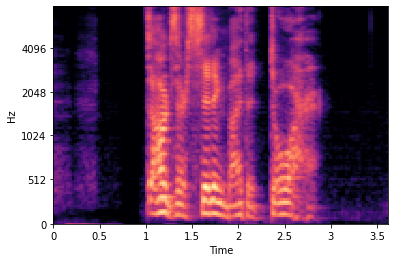

In [ ]:
counter=0
for index,path in enumerate(test.path):
  if test.iloc[counter,1]=='disgust':
    x, sr = librosa.load(path)
    x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000)
    y = librosa.power_to_db(x)
    librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
    plt.savefig(f'/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/test_logmel/disgust/{counter}.png')
  counter=counter+1

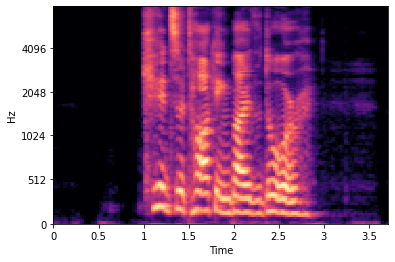

In [ ]:
counter=0
for index,path in enumerate(test.path):
  if test.iloc[counter,1]=='fear':
    x, sr = librosa.load(path)
    x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000)
    y = librosa.power_to_db(x)
    librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
    plt.savefig(f'/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/test_logmel/fearful/{counter}.png')
  counter=counter+1

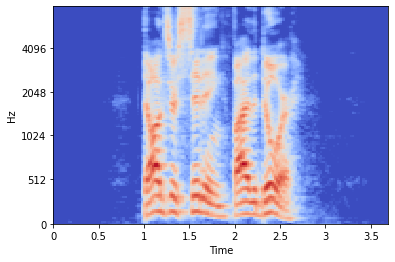

In [ ]:
counter=0
for index,path in enumerate(test.path):
  if test.iloc[counter,1]=='happy':
    x, sr = librosa.load(path)
    x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000)
    y = librosa.power_to_db(x)
    librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
    plt.savefig(f'/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/test_logmel/happy/{counter}.png')
  counter=counter+1

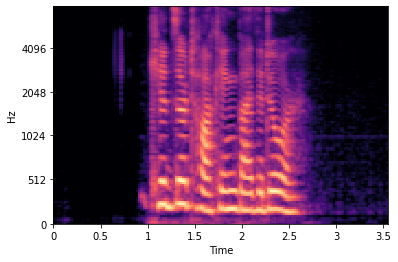

In [ ]:
counter=0
for index,path in enumerate(test.path):
  if test.iloc[counter,1]=='neutral':
    x, sr = librosa.load(path)
    x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000)
    y = librosa.power_to_db(x)
    librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
    plt.savefig(f'/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/test_logmel/neutral/{counter}.png')
  counter=counter+1

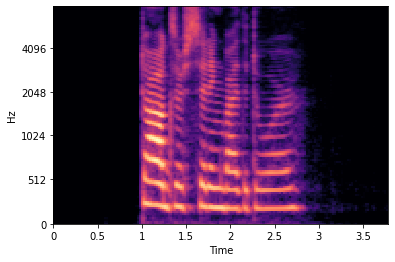

In [ ]:
counter=0
for index,path in enumerate(test.path):
  if test.iloc[counter,1]=='sad':
    x, sr = librosa.load(path)
    x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000)
    y = librosa.power_to_db(x)
    librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
    plt.savefig(f'/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/test_logmel/sad/{counter}.png')
  counter=counter+1

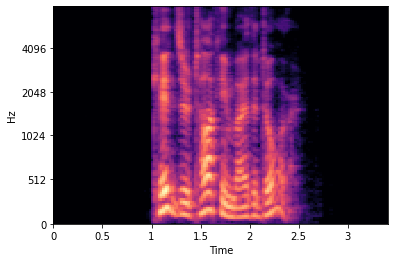

In [ ]:
counter=0
for index,path in enumerate(test.path):
  if test.iloc[counter,1]=='surprise':
    x, sr = librosa.load(path)
    x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000)
    y = librosa.power_to_db(x)
    librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
    plt.savefig(f'/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/test_logmel/surprised/{counter}.png')
  counter=counter+1

**So here we have converted all the audio files into Mel Spectrogram**

### **Importing Libraries**

In [ ]:
# IMPORT NECESSARY LIBRARIES
import librosa
import librosa.display
from tqdm import tqdm

import os, glob, sys

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
%matplotlib inline

import soundfile as sf
import IPython.display as ipd
from IPython.display import Audio

from random import randint
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

import keras
import tensorflow as tf
from keras.utils import np_utils
import tensorflow.keras as keras
from keras.models import load_model
from tensorflow.keras import layers
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import vgg19
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import layers, models, Model, optimizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense

import itertools
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

###**Reading training file spectogram images**

In [ ]:
import glob
angry = glob.glob('/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/train_logmel/angry/*.*')
calm = glob.glob('/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/train_logmel/calm/*.*')
disgust = glob.glob('/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/train_logmel/disgust/*.*')
fearful = glob.glob('/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/train_logmel/fear/*.*')
happy = glob.glob('/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/train_logmel/happy/*.*')
neutral = glob.glob('/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/train_logmel/neutral/*.*')
sad = glob.glob('/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/train_logmel/sad/*.*')
surprised = glob.glob('/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/train_logmel/surprise/*.*')

In [ ]:
train_data = []
train_labels = []

for i in angry:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Angry')
for i in calm:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Calm')
for i in disgust:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Disgust')
for i in fearful:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Fearful')
for i in happy:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Happy')
for i in neutral:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Neutral')
for i in sad:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Sad')
for i in surprised:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Surprised')

train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [ ]:
X_train=train_data
y_train=train_labels

###**Reading testing file spectogram images**

In [ ]:
import glob
angry = glob.glob('/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/test_logmel/angry/*.*')
calm = glob.glob('/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/test_logmel/calm/*.*')
disgust = glob.glob('/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/test_logmel/disgust/*.*')
fearful = glob.glob('/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/test_logmel/fear/*.*')
happy = glob.glob('/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/test_logmel/happy/*.*')
neutral = glob.glob('/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/test_logmel/neutral/*.*')
sad = glob.glob('/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/test_logmel/sad/*.*')
surprised = glob.glob('/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Dataset 1/test_logmel/surprise/*.*')

In [ ]:
test_data = []
test_labels = []

for i in angry:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Angry')
for i in calm:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Calm')
for i in disgust:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Disgust')
for i in fearful:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Fearful')
for i in happy:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Happy')
for i in neutral:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Neutral')
for i in sad:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Sad')
for i in surprised:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Surprised')

test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [ ]:
X_test=test_data
y_test=test_labels

####**Some sample images**

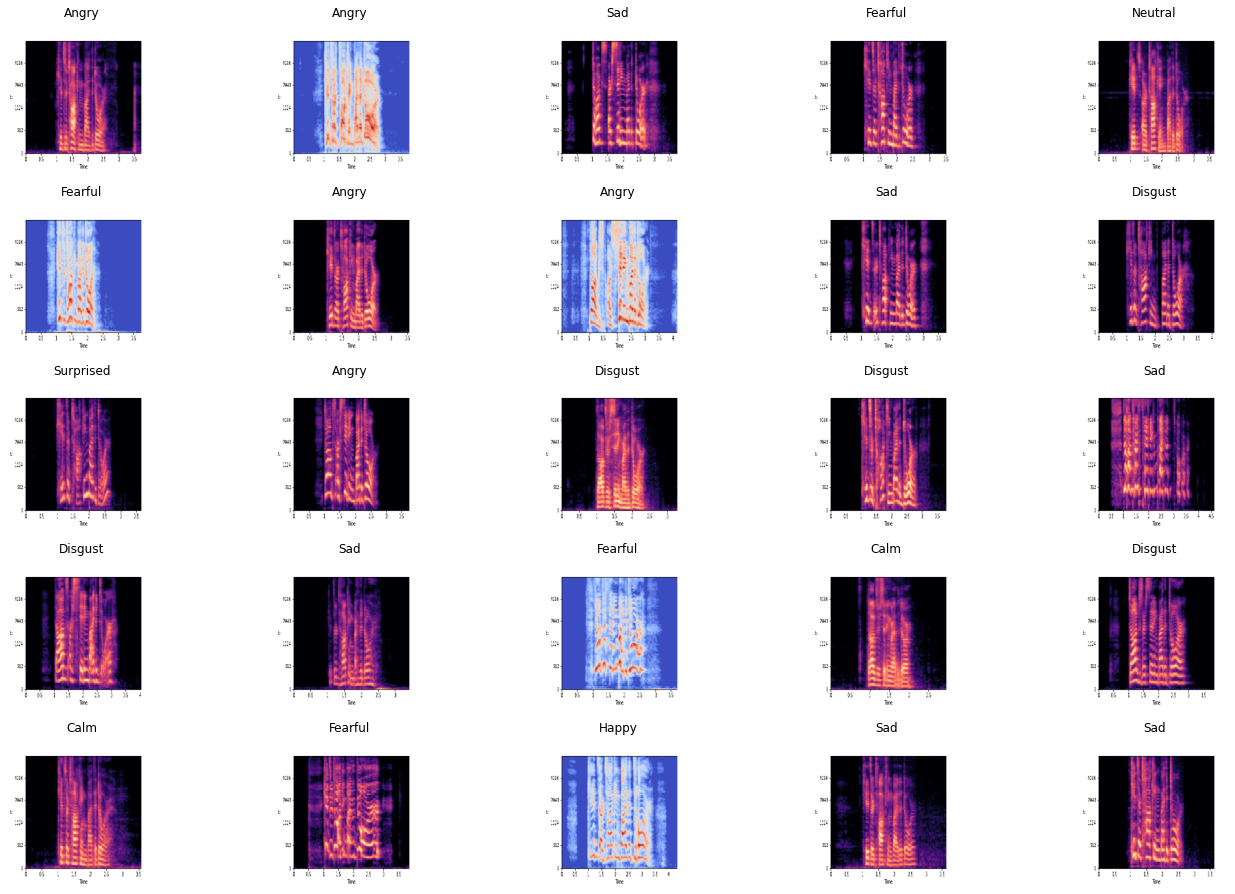

In [ ]:
def get_classlabel(class_code):
    labels = {'Angry':'Angry', 'Calm':'Calm', 'Disgust':'Disgust', 'Fearful':'Fearful', 'Happy':'Happy', 'Neutral':'Neutral','Sad':'Sad','Surprised':'Surprised'}
    
    return labels[class_code]

f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(train_data))
        ax[i,j].imshow(train_data[rnd_number])
        ax[i,j].set_title(get_classlabel(train_labels[rnd_number]))
        ax[i,j].axis('off')

In [ ]:
# Check shapes of training and testing sets
print('X_train has a shape of {}, y_train has a shape of {}'.format(X_train.shape,y_train.shape))
print('X_test has a shape of {}, y_test has a shape of {}'.format(X_test.shape,y_test.shape))

X_train has a shape of (1177, 224, 224, 3), y_train has a shape of (1177,)
X_test has a shape of (288, 224, 224, 3), y_test has a shape of (288,)


In [ ]:
# Finally, we normalize pixels in X_train and X_test to the range [0,1] for faster convergence
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

###**VGG16 Fine-Tuning**

In [ ]:
vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg_model.layers[:15]:
    layer.trainable = False

In [ ]:
# Make sure you have frozen the correct layers
for i, layer in enumerate(vgg_model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [ ]:
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(8, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

In [ ]:
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', 
                              patience = 2, 
                              verbose=1,
                              factor=0.3, 
                              min_lr=0.000001)

checkpoint = ModelCheckpoint('finetune.h15', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)


In [ ]:
learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# Here we use testing set as validation set
history = transfer_model.fit(X_train, y_train, batch_size = 1, epochs=14, validation_data=(X_test,y_test), callbacks=[lr_reduce,checkpoint])

Epoch 1/14
1177/1177 [==============================] - 1000s 848ms/step - loss: 2.1020 - accuracy: 0.1164 - val_loss: 2.0771 - val_accuracy: 0.1319

Epoch 00001: val_accuracy improved from -inf to 0.13194, saving model to finetune.h15
INFO:tensorflow:Assets written to: finetune.h15/assets
Epoch 2/14
1177/1177 [==============================] - 1017s 864ms/step - loss: 2.0712 - accuracy: 0.1240 - val_loss: 2.0718 - val_accuracy: 0.1354

Epoch 00002: val_accuracy improved from 0.13194 to 0.13542, saving model to finetune.h15
INFO:tensorflow:Assets written to: finetune.h15/assets
Epoch 3/14
1177/1177 [==============================] - 1008s 856ms/step - loss: 2.0658 - accuracy: 0.1223 - val_loss: 2.0738 - val_accuracy: 0.1215

Epoch 00003: val_accuracy did not improve from 0.13542
Epoch 4/14
1177/1177 [==============================] - 1024s 870ms/step - loss: 2.0661 - accuracy: 0.1138 - val_loss: 2.0714 - val_accuracy: 0.1319

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.4

In [ ]:
tf.keras.models.save_model(transfer_model,'/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Models/vgg.hdf5')

In [ ]:
transfer_model.save_weights('/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Models/vgg_weights.h5')

####**Model accuracy graph**

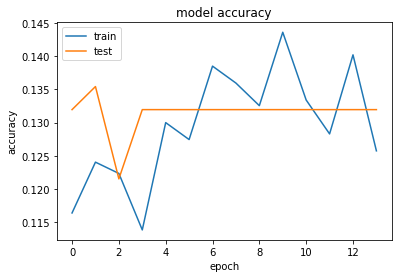

In [ ]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()

####**Model loss graph**

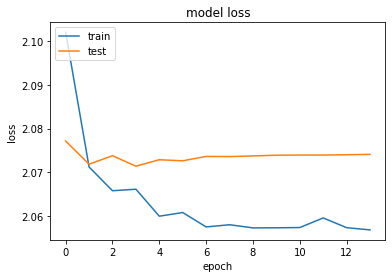

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

####**Confusion Matrix**

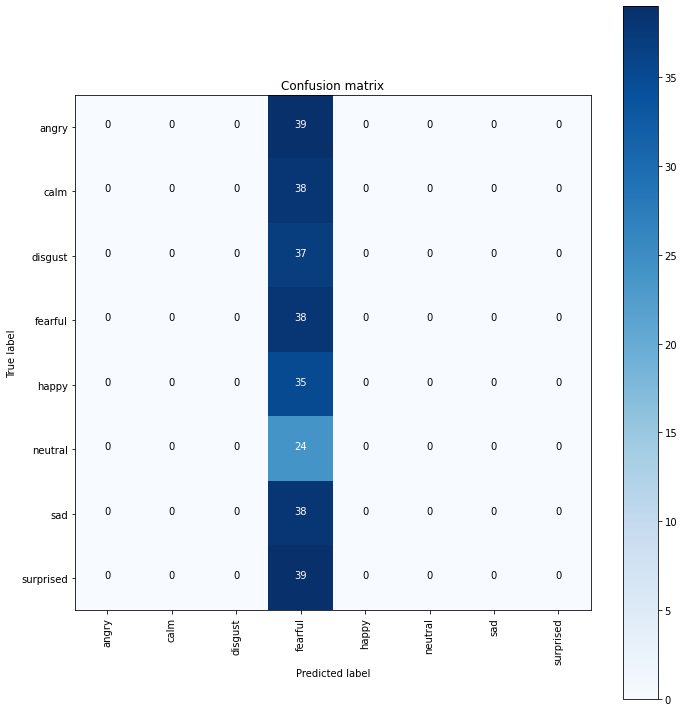

In [ ]:
y_pred = transfer_model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [ ]:
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.00      0.00      0.00        39
        calm       0.00      0.00      0.00        38
     disgust       0.00      0.00      0.00        37
     fearful       0.13      1.00      0.23        38
       happy       0.00      0.00      0.00        35
     neutral       0.00      0.00      0.00        24
         sad       0.00      0.00      0.00        38
   surprised       0.00      0.00      0.00        39

    accuracy                           0.13       288
   macro avg       0.02      0.12      0.03       288
weighted avg       0.02      0.13      0.03       288



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###**VGG19 Fine Tuning**

In [ ]:
img_height, img_width = 224,224
conv_base = vgg19.VGG19(weights='imagenet', pooling='avg', include_top=False, input_shape = (img_width, img_height, 3))

80150528/80134624 [==============================] - 3s 0us/step


In [ ]:
for layer in conv_base.layers[:12]:
    layer.trainable = False

In [ ]:
# Make sure you have frozen the correct layers
for i, layer in enumerate(conv_base.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_conv4 False
11 block3_pool False
12 block4_conv1 True
13 block4_conv2 True
14 block4_conv3 True
15 block4_conv4 True
16 block4_pool True
17 block5_conv1 True
18 block5_conv2 True
19 block5_conv3 True
20 block5_conv4 True
21 block5_pool True
22 global_average_pooling2d True


In [ ]:
model=models.Sequential()
model.add(conv_base)
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(8,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 2056      
Total params: 20,157,768
Trainable params: 17,832,200
Non-trainable params: 2,325,568
_________________________________________________________________


In [ ]:
batch_size=16
learning_rate = 5e-5
epochs = 50
checkpoint = ModelCheckpoint("vgg_19_classifier16.h5", monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(X_train, y_train,batch_size=batch_size,
                              epochs=epochs,
                              shuffle=True, 
                              validation_data=(X_test,y_test),
                              callbacks=[checkpoint]
                              )

Epoch 1/50
74/74 [==============================] - 61s 337ms/step - loss: 1.9763 - acc: 0.2319 - val_loss: 1.7665 - val_acc: 0.3438

Epoch 00001: val_acc improved from -inf to 0.34375, saving model to vgg_19_classifier16.h5
Epoch 2/50
74/74 [==============================] - 21s 285ms/step - loss: 1.6619 - acc: 0.3951 - val_loss: 1.4427 - val_acc: 0.4375

Epoch 00002: val_acc improved from 0.34375 to 0.43750, saving model to vgg_19_classifier16.h5
Epoch 3/50
74/74 [==============================] - 24s 321ms/step - loss: 1.2673 - acc: 0.5421 - val_loss: 1.2377 - val_acc: 0.5278

Epoch 00003: val_acc improved from 0.43750 to 0.52778, saving model to vgg_19_classifier16.h5
Epoch 4/50
74/74 [==============================] - 21s 287ms/step - loss: 1.0665 - acc: 0.6007 - val_loss: 1.0972 - val_acc: 0.5833

Epoch 00004: val_acc improved from 0.52778 to 0.58333, saving model to vgg_19_classifier16.h5
Epoch 5/50
74/74 [==============================] - 24s 321ms/step - loss: 0.9363 - acc: 0.

####**Model accuracy graph**

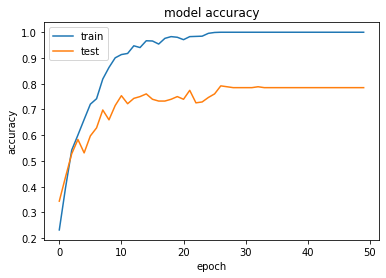

In [ ]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()

####**Model loss graph**

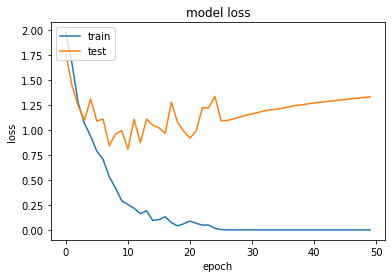

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

####**Confusion Matrix**

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

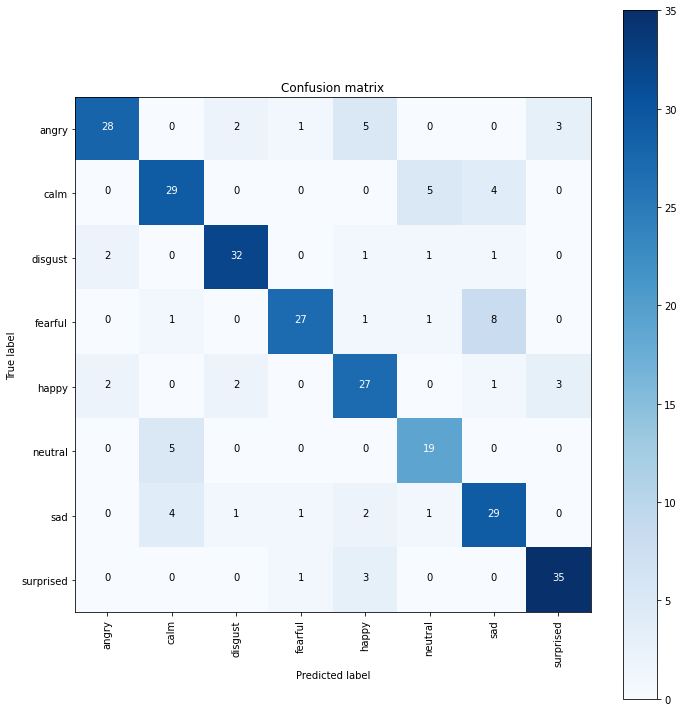

In [ ]:
y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [ ]:
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.88      0.72      0.79        39
        calm       0.74      0.76      0.75        38
     disgust       0.86      0.86      0.86        37
     fearful       0.90      0.71      0.79        38
       happy       0.69      0.77      0.73        35
     neutral       0.70      0.79      0.75        24
         sad       0.67      0.76      0.72        38
   surprised       0.85      0.90      0.88        39

    accuracy                           0.78       288
   macro avg       0.79      0.79      0.78       288
weighted avg       0.79      0.78      0.79       288



In [ ]:
tf.keras.models.save_model(model,'/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Models/vgg_fine_tuning.hdf5')

In [ ]:
model.save_weights('/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Models/vgg_fine_tuning_weights.h5')

### **VGG19 Fine Tuning + Augmentation**

In [ ]:
#Image Data Augmentation
train_datagen = ImageDataGenerator(
                                    zoom_range=0.5,
                                   rotation_range=20,
                                   width_shift_range=0.5)

train_generator = train_datagen.flow(X_train,
                                     y_train,
                                     batch_size=16)

lr_reduce = ReduceLROnPlateau(monitor='val_acc', 
                              patience = 2, 
                              verbose=1,
                              factor=0.95, 
                              min_lr=0.000001)

checkpoint = ModelCheckpoint("vgg19augm20.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

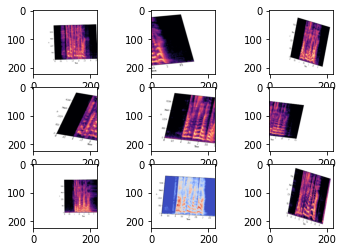

In [ ]:
img_rows, img_cols = 224, 224

for x, y in train_datagen.flow(X_train, y_train, batch_size=9):
    # Show the first 9 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(x[i].reshape(img_rows, img_cols, 3))
    # show the plot
    pyplot.show()
    break

In [ ]:
for layer in conv_base.layers[:12]:
    layer.trainable = False

In [ ]:
for i, layer in enumerate(conv_base.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_conv4 False
11 block3_pool False
12 block4_conv1 True
13 block4_conv2 True
14 block4_conv3 True
15 block4_conv4 True
16 block4_pool True
17 block5_conv1 True
18 block5_conv2 True
19 block5_conv3 True
20 block5_conv4 True
21 block5_pool True
22 global_average_pooling2d True


In [ ]:
input_shape=(224,224,3)

model=models.Sequential()
model.add(conv_base)
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(8,activation='softmax'))
model.summary()

from tensorflow.keras import layers, models, Model, optimizers

#Initializing the hyperparameters
learning_rate = 5e-5
epochs = 80
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])
history = model.fit(train_generator,
                              epochs = epochs, 
                              # steps_per_epoch = X_train.shape[0]//batch_size, 
                              validation_data = (X_test,y_test), 
                              callbacks=[checkpoint,lr_reduce], 
                              verbose = 1,
                              shuffle=True
                              )

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 2056      
Total params: 20,157,768
Trainable params: 17,832,200
Non-trainable params: 2,325,568
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/80
74/74 [==============================] - 25s 320ms/step - loss: 1.9169 - acc: 0.2668 - val_loss: 1.1934 - val_acc: 0.5868

Epoch 00001: val_acc improved from -inf to 0.58681, saving model to vgg19augm20.h5
Epoch 2/80
74/74 [==============================] - 23s 311ms/step - loss: 1.3452 - acc: 0.5115 - val_loss: 0.9377 - val_acc: 0.6771

Epoch 00002: val_acc improved from 0.58681 to 0.67708, saving model to vgg19augm20.h5
Epoch 3/80
74/74 [==============================] - 23s 311ms/step - loss: 1.1211 - acc: 0.6134 - val_loss: 0.7912 - val_acc: 0.7396

Epoch 00003: val_acc improved from 0.67708 to 0.73958, saving model to vgg19augm20.h5
Epoch 4/80
74/74 [==============================] - 23s 313ms/step - loss: 1.0150 - acc: 0.6245 - val_loss: 0.7967 - val_acc: 0.7500

Epoch 00004: val_acc improved from 0.73958 to 0.75000, saving model to vgg19augm20.h5
Epoch 5/80
74/74 [==============================] - 23s 313ms/step - loss: 0.9603 - acc: 0.6440 - val_loss: 0.7842 - val_ac

####**Model accuracy graph**

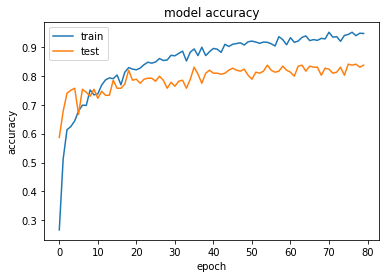

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()

####**Model loss graph**

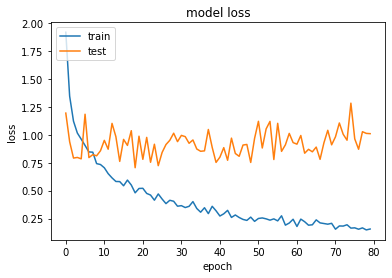

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

####**Confusion Matrix**

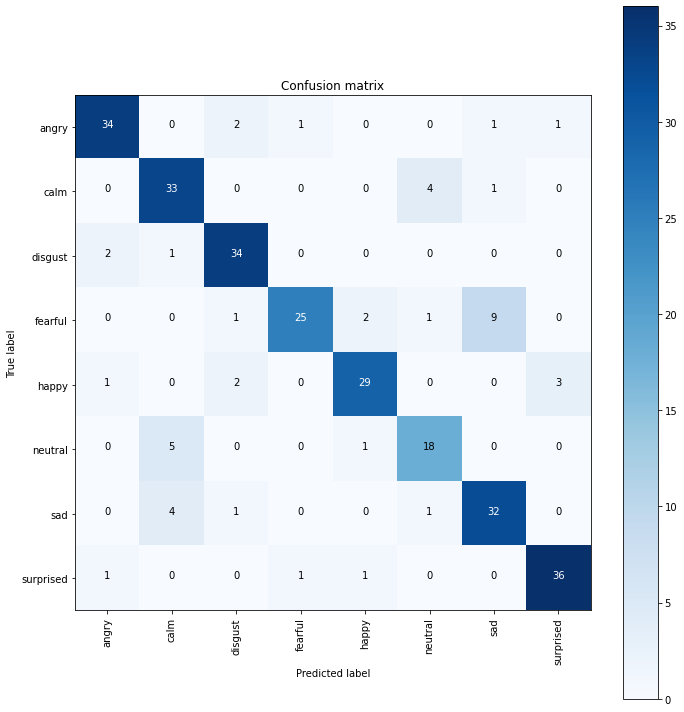

In [ ]:
y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [ ]:
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.89      0.87      0.88        39
        calm       0.77      0.87      0.81        38
     disgust       0.85      0.92      0.88        37
     fearful       0.93      0.66      0.77        38
       happy       0.88      0.83      0.85        35
     neutral       0.75      0.75      0.75        24
         sad       0.74      0.84      0.79        38
   surprised       0.90      0.92      0.91        39

    accuracy                           0.84       288
   macro avg       0.84      0.83      0.83       288
weighted avg       0.84      0.84      0.84       288



In [ ]:
tf.keras.models.save_model(model,'/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Models/vgg_aug.hdf5')

In [ ]:
model.save_weights('/content/drive/MyDrive/Speech-Emotion-Recognition-Adarsh Kumar/Models/vgg_aug_weights.h5')

**So these are the some of the final conclusions after implementing various technique and models in the given dataset.These are as follows:-**



**1. VGG16 (fine tuning + augmentation) was giving the best accuracy score of 82%  and solved the problems like overfitting to some extent.**

 **2. It's quite difficult to get the accuracy of more than 90% due to lack of data.** 

**3. To solve problems like over-fitting that we had seen in almost every model, we need more real-time data.** 

**4. Noise Adding, Pitching and Shifting for the imbalanced data was helping in achieving a better result.**

**5.Computational cost was much high resulting in several runtime crashes but we’re able to get our best model for deployment.**